In [1]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jsonlines

from utils import *

# Experiment 1

In [2]:
detector = "distil_roberta-base"
training_method = "adapter"
model_code = "04_04_1026"
eval_acc_df, degrad_loss_df, training_loss_df = create_df_from_training_logs(detector, training_method, model_code)

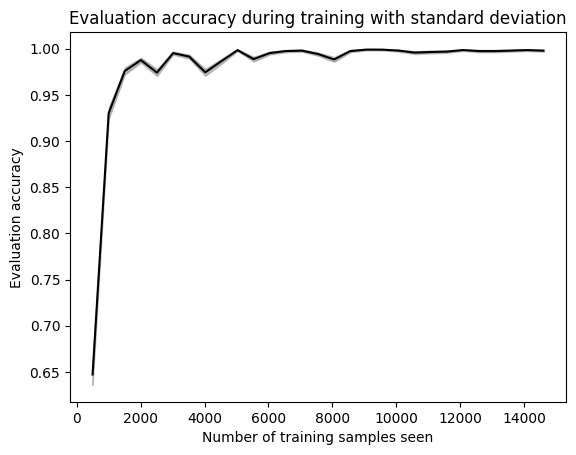

In [3]:
plot_eval_acc_vs_nb_samples(eval_acc_df)

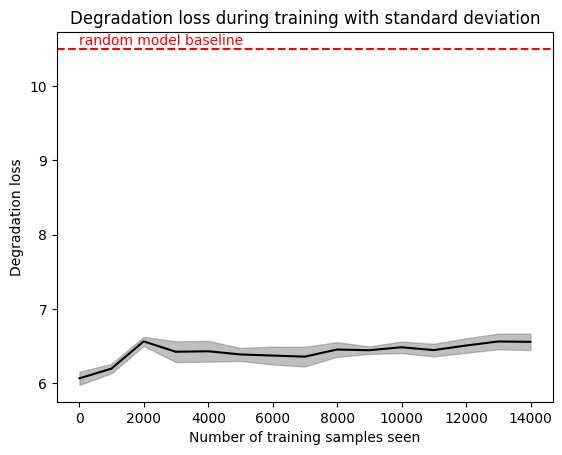

In [4]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df)

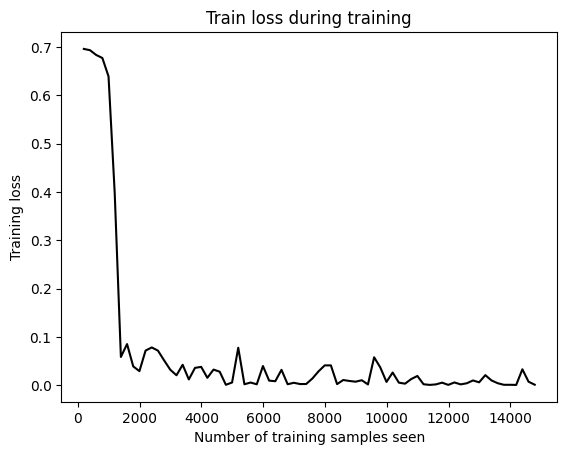

In [5]:
plot_training_loss_vs_nb_samples(training_loss_df)

In [4]:
detector = "roberta_large"
training_method = "full_finetuning"
model_code = "04_04_1037"
eval_acc_df, degrad_loss_df, training_loss_df = create_df_from_training_logs(detector, training_method, model_code)

FileNotFoundError: [Errno 2] No such file or directory: './saved_training_logs_experiment_1/roberta_large/full_finetuning/fake_true_dataset_mistral_10k/04_04_1037/training_logs.json'

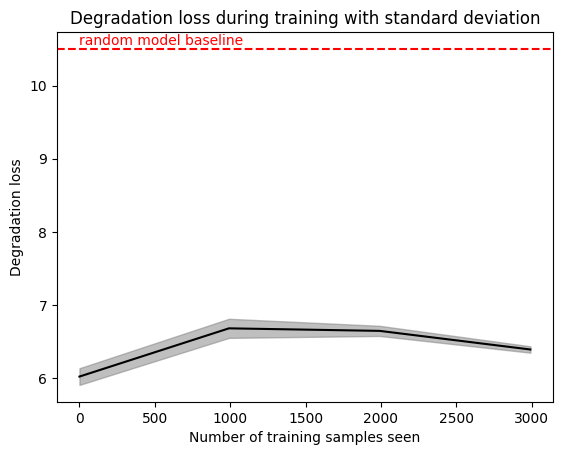

In [3]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df)

# Experiment 2

## freeze base

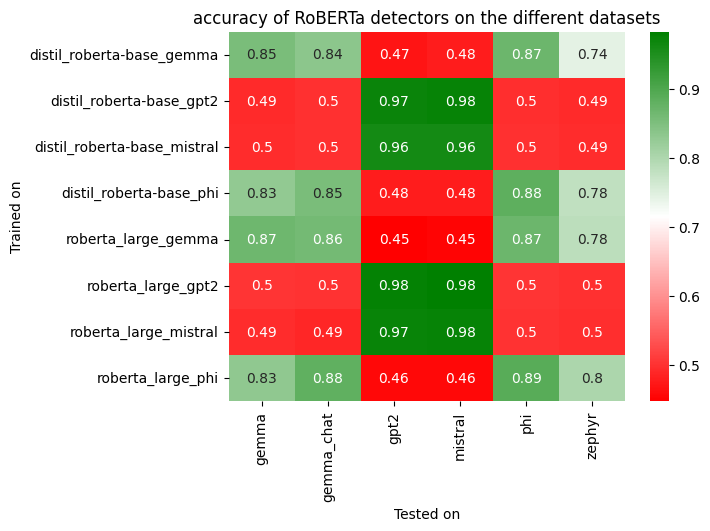

In [7]:
"""
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"
"""


training_method = "freeze_base"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"04_04_0958":"gpt2", "04_04_1001": "phi", "04_04_1004": "gemma", "04_04_1007": "mistral"},
                    "roberta_large": {"04_04_0958":"gpt2", "04_04_1010": "phi", "04_04_1023": "gemma", "04_04_1034": "mistral"}}


dataset_names = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]


freeze_base_df = create_df_from_test_logs("freeze_base", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

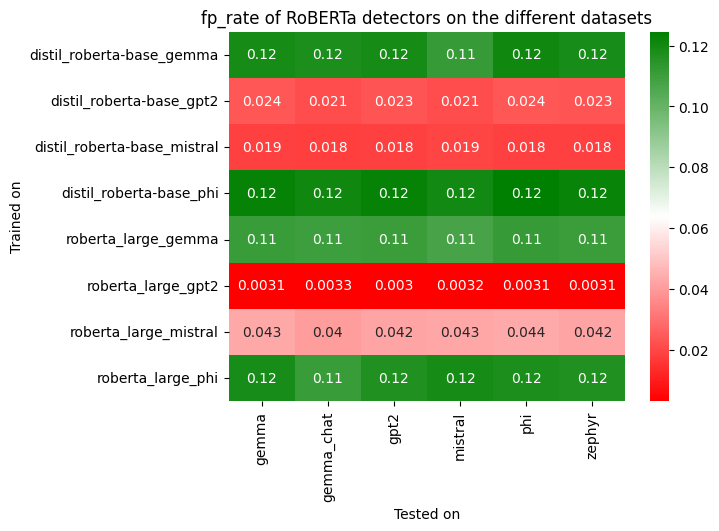

In [8]:
heatmap_from_df(freeze_base_df, "fp_rate")

## full_finetuning

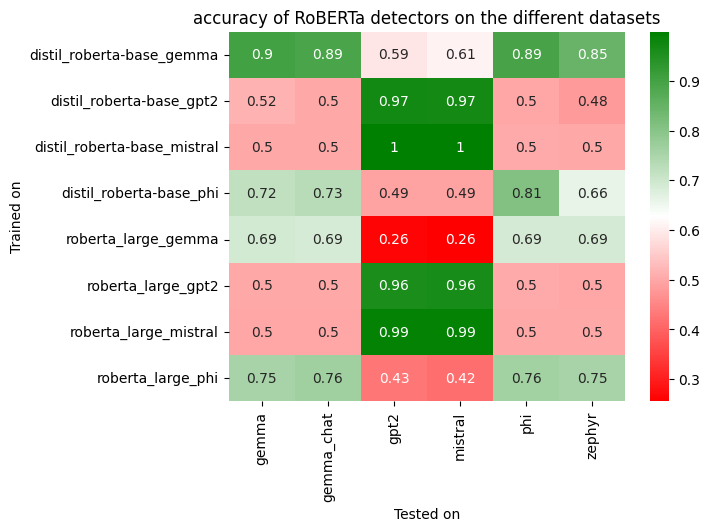

In [9]:
training_method = "full_finetuning"
trained_on_models = {"distil_roberta-base": {"04_04_1031":"gpt2", "04_04_1032": "phi", "04_04_1033": "gemma", "04_04_1035": "mistral"},
                    "roberta_large": {"04_04_1141":"gpt2", "04_04_1145": "phi", "04_04_1147": "gemma", "04_04_1149": "mistral"}}


freeze_base_df = create_df_from_test_logs("full_finetuning", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

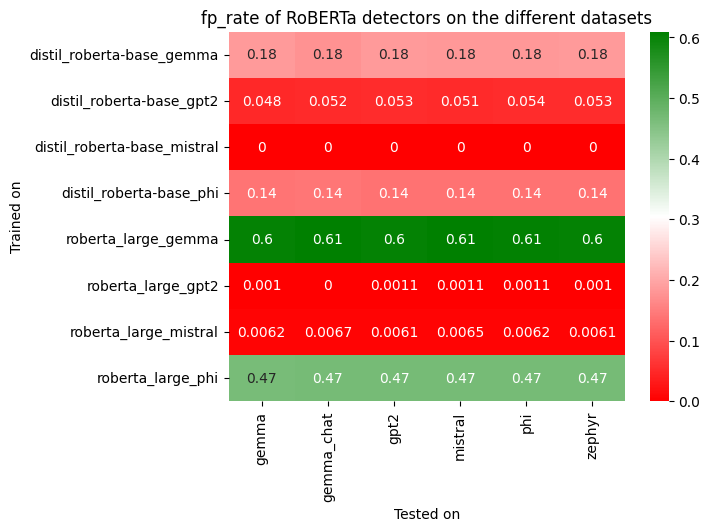

In [10]:
heatmap_from_df(freeze_base_df, "fp_rate")